In [28]:
from scipy import integrate
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

# load in observational data #

In [43]:
col_names=['name', 'WEBDA', 'vsini', 'vsini_error', 'Vr1', 'Vr2', 'Vr3', 'SpType', 'Notes']
#~ 1-  7 A7     ---     Name    Cluster name
   #~ 9- 13 I5     ---     WEBDA   Webda ID (http://obswww.unige.ch/web) (1)
  #~ 15- 17 I3     km/s    vsini   Derived projected rotational velocity 
  #~ 19- 20 I2     km/s  e_vsini   Measurement error in vsini 
  #~ 22- 27 F6.1   km/s    Vr(N1)  Radial velocity from first night (2)
  #~ 29- 34 F6.1   km/s    Vr(N2)  ? Radial velocity from second night if available
                                 #~ (2)
  #~ 36- 41 F6.1   km/s    Vr(N3)  ? Radial velocity from third night if available
                                 #~ (2)
  #~ 43- 46 F4.1   ---     SpType  Index of estimated pseudo-spectral type (3)
  #~ 48-142 A95    ---     Notes   Additional notes 

df=pd.read_fwf('./Huang2006_rotdist (copy).dat',  skiprows=74,
                names=col_names, widths=[9,4,4,3,7,7,7,6, 70 ])

df.head(100)

,name,WEBDA,vsini,vsini_error,Vr1,Vr2,Vr3,SpType,Notes
0,Ber86,1.0,184.0,7.0,30.3,30.8,NaN,1.3,NaN
1,Ber86,3.0,192.0,10.0,-24.6,7.5,NaN,4.0,SB2
2,Ber86,4.0,178.0,8.0,17.2,45.2,NaN,1.0,SB2
3,Ber86,9.0,362.0,21.0,-7.6,-15.7,NaN,3.3,NaN
4,Ber86,12.0,309.0,11.0,-6.8,8.0,NaN,10.0,NaN
5,Ber86,13.0,182.0,6.0,49.9,48.3,NaN,0.7,NaN
6,Ber86,14.0,133.0,16.0,-131.7,-142.5,NaN,1.3,SB2
7,Ber86,15.0,23.0,15.0,-13.9,-15.8,NaN,5.0,NaN
8,Ber86,17.0,79.0,8.0,-41.4,-43.2,NaN,2.0,NaN
9,Ber86,30.0,103.0,12.0,-7.7,-7.7,NaN,6.3,NaN


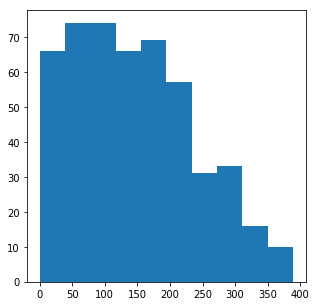

In [45]:
df=df.dropna(subset=['vsini']) # remove data with no vsini value eg last row of dataframe 
#print df['vsini']
plt.hist(df['vsini'])
plt.show()

# find CDF of data # 

max vsini =  389.0
   level_0  index     name   WEBDA  vsini  vsini_error   Vr1   Vr2   Vr3  \
0        0    471     TR16    15.0    0.0         15.0 -14.4   NaN   NaN   
1        1     73   IC2944    33.0    0.0         18.0 -17.3  -6.0 -10.9   
2        2     85   IC2944    98.0    1.0         39.0 -12.8  -3.8 -10.8   
3        3    282  NGC2244  1034.0    3.0         12.0  78.2  15.3  87.8   
4        4    340  NGC2422    71.0    3.0         12.0  29.4  34.0   NaN   

   SpType                Notes  unit  
0     2.3  emission in H-gamma   1.0  
1     2.0                  NaN   1.0  
2     2.0                  NaN   1.0  
3    14.0                  SB1   1.0  
4    13.0                  NaN   1.0  


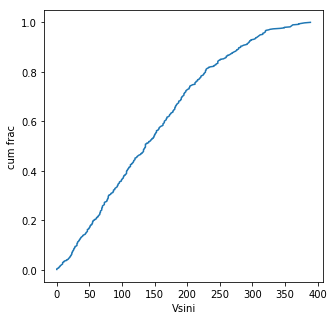

In [47]:
df=df.sort_values('vsini') # sort data by vsini 

df=df.reset_index() # reset indexes 
df['unit'] =np.ones(len(df)) # create col consisting of always 1 to perform cumulative sum over 

print "max vsini = ", df['vsini'].max()
print df.head()

#do cum sum and normalize 
q= df['unit'].cumsum()
q=q/q.max()


#plot
plt.plot(df['vsini'], q, '-')
plt.ylabel('cum frac')
plt.xlabel('Vsini')
plt.show()

# perform fit on cum distribution # 

389.0
fitted polynomial coefficients ; 
[ 3.90331832e-11 -4.22100420e-08  8.90681698e-06  3.19785129e-03
 -4.59405193e-03]


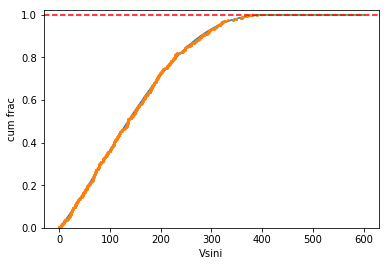

0      0.002016
1      0.004032
2      0.006048
3      0.008065
4      0.010081
5      0.012097
6      0.014113
7      0.016129
8      0.018145
9      0.020161
10     0.022177
11     0.024194
12     0.026210
13     0.028226
14     0.030242
15     0.032258
16     0.034274
17     0.036290
18     0.038306
19     0.040323
20     0.042339
21     0.044355
22     0.046371
23     0.048387
24     0.050403
25     0.052419
26     0.054435
27     0.056452
28     0.058468
29     0.060484
         ...   
466    0.941532
467    0.943548
468    0.945565
469    0.947581
470    0.949597
471    0.951613
472    0.953629
473    0.955645
474    0.957661
475    0.959677
476    0.961694
477    0.963710
478    0.965726
479    0.967742
480    0.969758
481    0.971774
482    0.973790
483    0.975806
484    0.977823
485    0.979839
486    0.981855
487    0.983871
488    0.985887
489    0.987903
490    0.989919
491    0.991935
492    0.993952
493    0.995968
494    0.997984
495    1.000000
Name: unit, dtype: float

In [69]:
#4th order polynomial fit to cum data
%matplotlib inline
p4=np.poly1d(np.polyfit(df['vsini'], q, 4))

print df['vsini'].max()

x_vals=np.linspace(0,df['vsini'].max(),400)

print "fitted polynomial coefficients ; \n" , p4.c

plt.plot(x_vals, p4(x_vals))
plt.plot(df['vsini'], q, '.', markersize=4)
plt.plot(tail_vals, p_tail(tail_vals))

plt.axhline(1, color='r', linestyle='--')


plt.ylim(0,1.02)
plt.ylabel('cum frac')
plt.xlabel('Vsini')
plt.show()

p_tail=np.poly1d(1)

tail_vals= np.linspace(x_vals[-1], 600, 100)
print q

# perform differentiation of fit to get PDF #


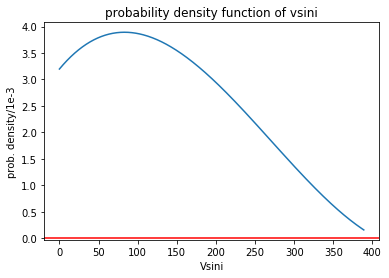

           3             2
1.561e-10 x - 1.266e-07 x + 1.781e-05 x + 0.003198
integral over whole distribution =  1.00088980567


In [62]:
%matplotlib inline

#differentiate polynomial object 
Pdf_vsini = np.polyder(p4)

#plot pdf 
plt.plot(x_vals, Pdf_vsini(x_vals)/1e-3)

plt.title("probability density function of vsini")
plt.ylabel('prob. density/1e-3')
plt.xlabel('Vsini')
plt.axhline(0, color='r')
plt.show()

print Pdf_vsini


# check integral over pdf equals unity

print "integral over whole distribution = ",integrate.quad( Pdf_vsini, 0, x_vals.max())[0]

# deconvolve vsini PDF to get v CDF #

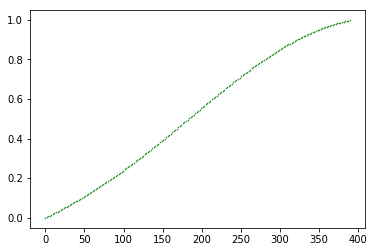

0.99728148544


In [70]:
# do deconvolution according to https://www.aanda.org/articles/aa/pdf/2014/05/aa23344-13.pdf



def integrand(y,x):
    #print x
    return (x/np.sqrt(y**2 - x**2) + np.arccos(x/y))*Pdf_vsini(y)


def I(x):
    i=integrate.quad( integrand, x, x_vals.max()+1, args=(x,)) # integration limit must be larger than max x value to avoid sqrt errors
    return i
#integrate.quad_explain()


# calculate cdf of v 
v_vals=np.linspace(0, x_vals.max(), 200)
Cdf_v=[]
for x in v_vals:
    F=1- (2*I(x)[0]/np.pi)
    Cdf_v.append( F)
        
plt.plot(v_vals, Cdf_v, 'g.', markersize=1)
plt.show()

print Cdf_v[-1]

# fit polynomial to v CDF #

fitted polynomial coefficients ; 
[ 8.94048891e-14 -9.91881111e-11  2.10848209e-08  3.06737689e-06
  1.97045479e-03 -6.35210029e-04]


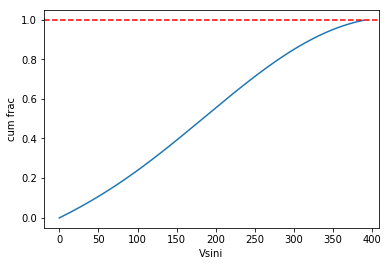

In [83]:
# fit polynomial to v cdf 

#4th order polynomial fit to cum data
p4_v=np.poly1d(np.polyfit(v_vals, Cdf_v, 5))


print "fitted polynomial coefficients ; \n" , p4_v.c

plt.plot(v_vals, p4_v(v_vals))
plt.axhline(1, color='r', linestyle='--')


#plt.ylim(0,1.05)
plt.ylabel('cum frac')
plt.xlabel('Vsini')
plt.show()

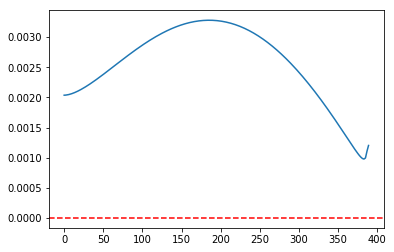

0.9983225309214042


In [90]:
v_cdf= np.gradient( Cdf_v, v_vals)

plt.plot(v_vals, v_cdf)
plt.axhline(0, color='r', linestyle='--')
plt.show()

print  integrate.cumtrapz(v_cdf, v_vals, initial=0)[-1]

# differentiate v CDF to get v PDF # 

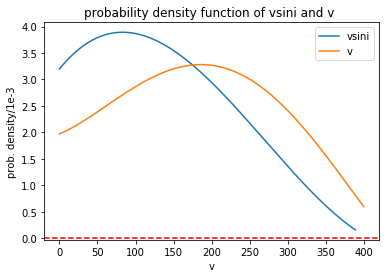

           3             2
1.561e-10 x - 1.266e-07 x + 1.781e-05 x + 0.003198
integral over whole v distribution =  0.996945453119
integral over whole vsini distribution =  1.00088980567


In [84]:
# differentiate polynomial to get pdf 
Pdf_v = np.polyder(p4_v)

#plot v pdf and compare with vsini pdf 
plt.plot(x_vals, Pdf_vsini(x_vals)/1e-3, label='vsini')
plt.plot(np.linspace(0,400,100), Pdf_v(np.linspace(0,400,100))/1e-3 , label='v')


plt.title("probability density function of vsini and v ")
plt.ylabel('prob. density/1e-3')
plt.xlabel('v')
plt.legend()
plt.axhline(0, color='r', linestyle='--')
plt.show()

print Pdf_vsini


# check integral over pdf equals unity

print "integral over whole v distribution = ",integrate.quad( Pdf_v, 0, x_vals.max())[0]
print "integral over whole vsini distribution = ",integrate.quad( Pdf_vsini, 0, x_vals.max())[0]

# export v and vsini distributions # 


In [89]:

v_dist=pd.DataFrame({'v':v_vals, 'pdf':np.gradient( Cdf_v, v_vals) })

vsini_dist=pd.DataFrame({'vsini':x_vals, 'pdf':Pdf_vsini(x_vals) })

v_dist.to_pickle('./v_dist.pk')#, protocol=2)

vsini_dist.to_pickle('./vsini_dist.pk')#, protocol=2)


# TESTINGS #

(760.3877349944282, 2.4202031454478856e-06)

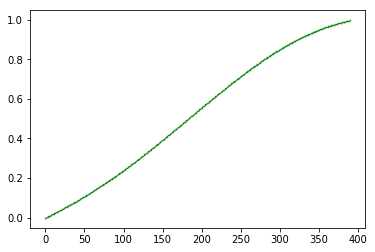

In [140]:
# do deconvolution according to https://www.aanda.org/articles/aa/pdf/2014/05/aa23344-13.pdf

%matplotlib inline


def integrand(y,x):
    #print x
    return (x/np.sqrt(y**2 - x**2) + np.arccos(x/y))*Pdf_vsini(y)


def I(x):
    i=integrate.quad( integrand, x, 390.0, args=(x,))
    return i
#integrate.quad_explain()


# calculate cdf of v 
Cdf_v=[]
for x in x_vals:
    F=1- (2*I(x)[0]/np.pi)
    Cdf_v.append( F)
        
plt.plot(x_vals, Cdf_v, 'g.', markersize=1)
plt.show()




In [133]:
print "F(0)= ", I(0)[0]
print 0.5*np.pi

F(0)=  1.57226347042
1.57079632679


fitted polynomial coefficients ; 
[ -9.79964819e-12  -1.11431030e-08   8.01078812e-06   1.68827271e-03
   2.95270898e-03]


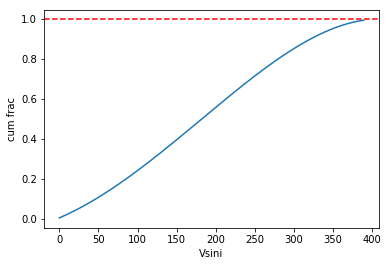

In [141]:
# fit polynomial to v cdf 

#4th order polynomial fit to cum data
p4_v=np.poly1d(np.polyfit(x_vals, Cdf_v, 4))


print "fitted polynomial coefficients ; \n" , p4_v.c

plt.plot(x_vals, p4_v(x_vals))
plt.axhline(1, color='r', linestyle='--')


#plt.ylim(0,1.05)
plt.ylabel('cum frac')
plt.xlabel('Vsini')
plt.show()

{0: 0.0016882727146357926, 1: 1.6021576232680473e-05, 2: -3.3429308875831273e-08, 3: -3.919859274644569e-11}


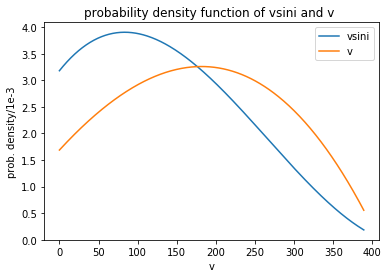

           3             2
1.653e-10 x - 1.317e-07 x + 1.852e-05 x + 0.003182
{0: 0.0031815583489201958, 1: 1.8520859819835209e-05, 2: -1.3170737656592523e-07, 3: 1.6527152827299824e-10}
integral over whole v distribution =  0.988619616174


In [142]:
# differentiate polynomial to get pdf 

polyn_v={} # dict with key being order of term, and key being multplicative coefficient
for c, n in zip(p4_v.c, reversed(range(1,5))):
    diffd= c*n 
    polyn_v[n-1]= diffd 
        
print polyn_v


# make numpy polynomial object
Pdf_v= np.poly1d([polyn_v[3], polyn_v[2], polyn_v[1], polyn_v[0]])

#plot pdf 
plt.plot(x_vals, Pdf_vsini(x_vals)/1e-3, label='vsini')
plt.plot(x_vals, Pdf_v(x_vals)/1e-3 , label='v')


plt.title("probability density function of vsini and v ")
plt.ylabel('prob. density/1e-3')
plt.xlabel('v')
plt.legend()
plt.show()

print Pdf_vsini
print polyn

# check integral over pdf equals unity

print "integral over whole v distribution = ",integrate.quad( Pdf_v, 0, x_vals.max())[0]

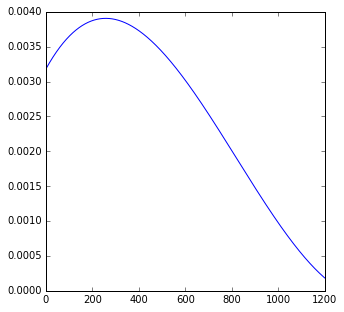

0.0130329074485


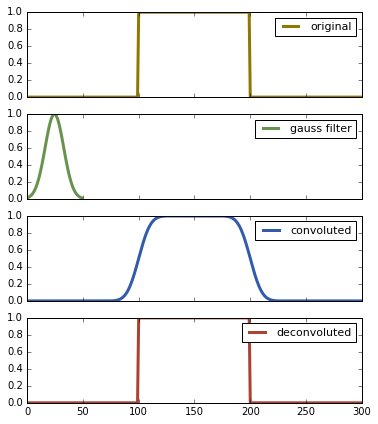

In [142]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)
# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )
print gauss.min()  # = 0.013 >> 0

# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
filtered = scipy.signal.convolve(signal, gauss, mode='same') 
filtered =  np.convolve(signal, gauss, mode='same') 


deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = (len(signal)-n)/2
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    ax[i].set_ylim([0, max(signal)])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

#plt.savefig(__file__ + ".png")
plt.show()    

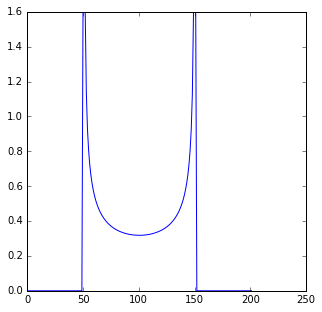

In [166]:


tail= np.append(np.zeros(50), filt[np.isfinite(filt)].max())
tail0= np.append( filt[np.isfinite(filt)].max() ,np.zeros(50))


kernel = np.concatenate((tail , filt), axis=0)
kernel = np.concatenate((kernel, tail0), axis=0)

plt.plot(kernel, label='sini')
plt.show()

<type 'numpy.ndarray'> <type 'numpy.ndarray'>


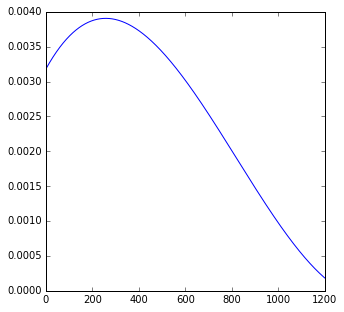

[ 1.  1.  1.  2.  3.  4.]
[        inf  1.59163063  1.13123924  0.9284512   0.80828315  0.72678574
  0.66701903  0.62088675  0.58396879  0.55362133  0.5281537   0.50642793
  0.48764646  0.47123162  0.45675346  0.44388458  0.43237073  0.42201116
  0.41264498  0.40414158  0.39639374  0.38931253  0.38282353  0.37686396
  0.37138048  0.36632745  0.36166562  0.35736103  0.35338421  0.3497094
  0.34631408  0.34317846  0.3402851   0.33761862  0.33516541  0.33291343
  0.33085203  0.32897176  0.32726428  0.32572223  0.32433911  0.32310926
  0.32202772  0.32109023  0.32029314  0.31963343  0.31910858  0.31871663
  0.31845613  0.31832613  0.31832613  0.31845613  0.31871663  0.31910858
  0.31963343  0.32029314  0.32109023  0.32202772  0.32310926  0.32433911
  0.32572223  0.32726428  0.32897176  0.33085203  0.33291343  0.33516541
  0.33761862  0.3402851   0.34317846  0.34631408  0.3497094   0.35338421
  0.35736103  0.36166562  0.36632745  0.37138048  0.37686396  0.38282353
  0.38931253  0.39639374  

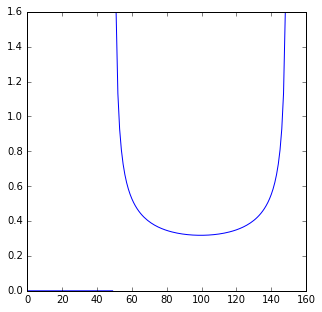

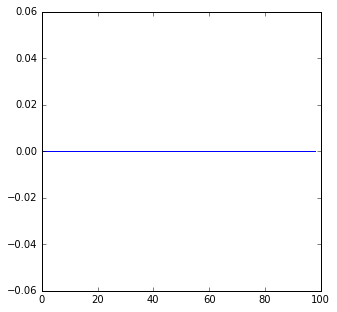

nan


In [6]:
import sys
sys.stdout.flush()


for i in range(0,10):
    sys.stdout.write ('\r'+str(i))

9

In [14]:
import time
import sys

for i in range(5):
    print i,
    #sys.stdout.flush()
    time.sleep(1)

0 1 2 3 4


In [27]:
count=1
import numpy as np
import time , sys
start_time = time.time()
import warnings
warnings.filterwarnings('ignore')

import os
beep = lambda x: os.system("echo -n '\a';sleep 0.2;" * x)
beep(5)
#loop over time values (units in yr)
#takes ~30s for 10 loops
for t_val in np.linspace(0,100e6, 4): 
    
    #message=  "working on loop "+ str(count) + " /100"
    #sys.stdout.write ('\r'+ message)
    print count,
    #sys.stdout.flush()
    count+=1
    

1 2 3 4
